<a href="https://colab.research.google.com/github/a-bzzzz/DataScienceIntro/blob/main/Copy_of_ecars_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# e-cars taxation

# data science intro course mini project

## Linear regression prediction model

The task is to predict the future sales/registration of new e-cars with the level of vechile taxation.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [ ]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)
n_men = sum(gen==0)
n_women = sum(gen==1)

# work hours: difference between men and women
hrs = np.empty(n)
hrs[gen==0] = np.random.binomial(60, 0.55, size=n_men)
hrs[gen==1] = np.random.binomial(60, 0.45, size=n_women)

# salary = hours * (100 + noise) (std.deviation 10)
sal = hrs * (100 + np.random.normal(0, 10, size=n))
# reduced salary for women
sal = sal - 200 * gen

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})


### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange. Blue and orange lines are the trend lines of each group accordingly. The overall trend line is shown in red.

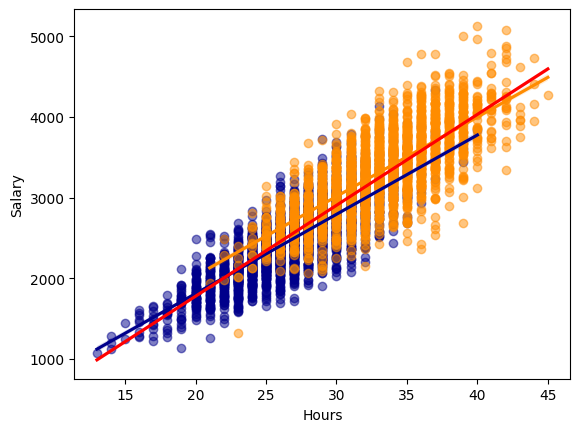

In [ ]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [ ]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100 without learning the 'protected characteristic' (gender)
print("slope: {:.2f}".format(reg.coef_[0][0]))

slope: 112.85


This model is trained using only the hours worked to predict salary. The slope in this case is slightly higher than the expected 100 because the salary is being influenced by gender indirectly, as women have their salaries reduced by 200 units in the data generation process. However, since gender is not included in the model, the model cannot account for this bias directly. The slope ends up reflecting both the contribution of hours worked and some of the unexplained variance (including the gender bias).

In [ ]:
# Train linear regression on both gender and hours
X = np.column_stack((gen, hrs))
reg = LinearRegression().fit(X, sal)

print("Coefficients: Gender {:.2f}, Hours {:.2f}".format(reg.coef_[0], reg.coef_[1]))

Coefficients: Gender -221.86, Hours 98.50


Here, the coefficient for gender is -194.46, meaning that being a woman (gen = 1) decreases the salary by this many units, showing the pay gap or direct discrimination. The coefficient for hours is 100.32, which is now very close to the expected value of 100, since the model has accounted for the gender bias separately.

Conclusion
To detect indirect discrimination, you should include the protected characteristic (gender) in the model. This allows the model to separate the effects of the legitimate features (such as hours worked) from the impact of the protected characteristic. Only by doing this can you see the disparity and accurately measure the extent of discrimination.